# 1. Лінійна регресія (1D)

In [379]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Згенеруйте синтетичний набір точок виду y = ax + b + noise.

In [380]:
points = 100    # количество точек
a, b = 22, 11   # параметры а (наклон) и б (сдвиг)
intensity = 10  # дисперсия шума
xrange = 0, 5   # интервал координат х
# -------------------------------------------------
noise = np.random.normal(0, intensity, points)       # генерация шума ~ N(0, intensity)
X = np.random.uniform(xrange[0], xrange[1], points)  # генерация координат Х ~ U[xrange]
Y = a * X + b + noise                                # результирующие исходные точки Y(X)

Візуалізуйте результат за допомогою (matplotlib).

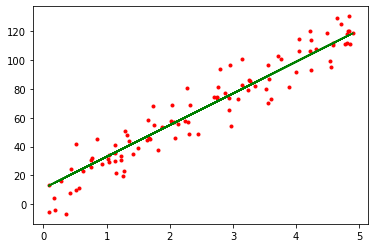

In [381]:
plt.scatter(X, Y, marker = '.', color = 'r')  # красные точки - исходные точки Y(X)
plt.plot(X, a * X + b, color = 'g')           # зеленая линия - истинная линия y=a*x+b

Вирішіть задачу лінійної регресії для такого набору точок. Параметри моделі знайдіть за допомогою градієнтного спуску.

<b>Сумма квадратов отклонений</b>
$$ F(a, b) = \sum_{i}{e_i^2} = \sum_{i}(y_i - a x_i - b)^2$$ 

<b>Градиенты</b>
$$ \frac{\partial F(a,b)}{\partial a} = 2 \sum_{i} [(y_i - a x_i - b)(-x_i)] = 2 \sum_{i} [(-x_i)e_i] = - 2 \sum_{i} x_i e_i $$
$$ \frac{\partial F(a,b)}{\partial b} = 2 \sum_{i} [a x_i + b - y_i] = 2 \sum_{i} [-e_i] = - 2 \sum_{i} e_i $$

[Выкладки по МНК](http://www.mathprofi.ru/metod_naimenshih_kvadratov.html)

In [382]:
iter_limit = 200   # количество итераций
learn_rate = 0.05  # скорость обучения
# -------------------------------------------------
a_, b_ = 0, 0      # перебираемые а и б
a_hist, b_hist, e_hist = [a_], [b_], []  # история а, б и ошибки по итерациям
for it in range(0, iter_limit):
    Y_ = a_ * X + b_  # текущие значения по перебираемым параметрам
    err = Y - Y_      # отклонение от исходных точек
    a_grad = -2 * (X * err).mean()  # градиент по а
    b_grad = -2 * err.mean()        # градиент по б
    a_ -= learn_rate * a_grad       # изменение а по градиенту
    b_ -= learn_rate * b_grad       # изменение б по градиенту
    a_hist.append(a_)               # запись
    b_hist.append(b_)               #    переменных
    e_hist.append(abs(err).sum())   #       в историю
e_hist.append(abs(err).sum())       # чтобы не ругалось на размерность
print('true a = {} | {} = approx a'.format(a, a_)) # вывод найденных значений
print('true b = {} | {} = approx b'.format(b, b_)) #   и истинных значений

true a = 22 | 23.339057414182815 = approx a
true b = 11 | 7.029111688686417 = approx b


Порівняйте знайдені параметри із значеннями (a, b).

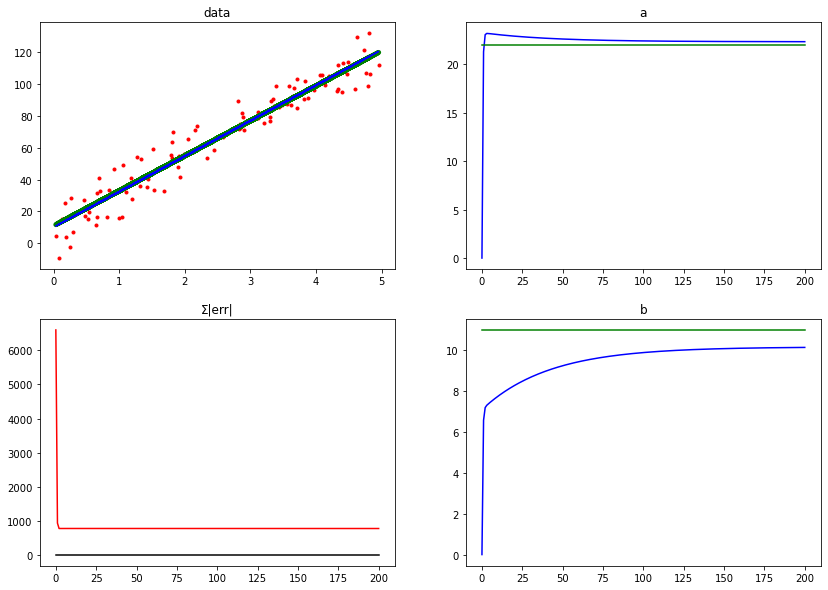

In [349]:
its = range(0, iter_limit+1) # значения по оси Х
fig = plt.figure(figsize=(14,10))
fig.add_subplot(2, 2, 1).set_title('data')        # верхний левый график
plt.scatter(X, Y, marker = '.', color = 'r')      # красные точки исходные
plt.plot(X, a * X + b, color = 'g', linewidth=5)  # зеленая линия - истинная исходная
plt.plot(X, a_ * X + b_, color = 'b')             # синяя линия - найденная приблизительная
fig.add_subplot(2, 2, 2).set_title('a')               # верхний правый график
plt.plot(its, a_hist, color='b')                      # синяя линия - изменение а по итерациям
plt.plot(its, np.zeros(iter_limit+1) + a, color='g')  # зеленая линия - истинное значение а
fig.add_subplot(2, 2, 4).set_title('b')                # нижний правый график
plt.plot(its, b_hist, color='b')                       # синяя линия - изменение б по итерациям
plt.plot(its, np.zeros(iter_limit+1) + b, color='g')   # зеленая линия - истинное значение б
fig.add_subplot(2, 2, 3).set_title('Σ|err|')      # нижний левый график
plt.plot(its, e_hist, color='r')                  # красная линия - сумма погрешностей по итерациям
plt.plot(its, np.zeros(iter_limit+1), color='k')  # черная линия - просто ноль

# 2. Логістична регресія (2D)

Згенеруйте два синтетичних набори точок на площині, додайте ім мітки класів (0 і 1).

Візуалізуйте результат за допомогою (matplotlib).

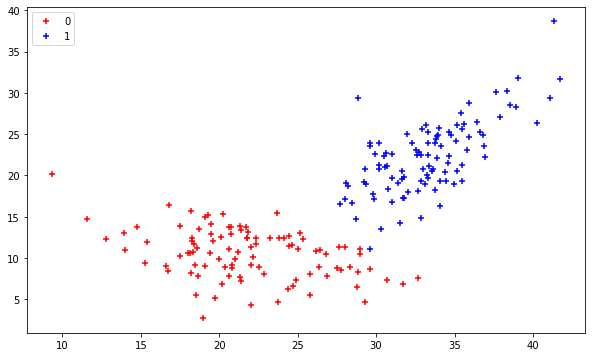

In [395]:
points = 100        # количество точек
mean_1 = [22, 11]   # вектор среднего
cov_1 = [[20, -5],  #   и матрица ковариации
         [-5, 10]]  #     для первого класса  
mean_2 = [33, 22]   # вектор среднего
cov_2 = [[10, 10],  #   и матрица ковариации
         [10, 20]]  #     для второго класса
# -------------------------------------------------
pts_1 = np.random.multivariate_normal(mean_1, cov_1, points)  # получение выборки точек из первого (0)
pts_2 = np.random.multivariate_normal(mean_2, cov_2, points)  #   и второго (1) класса ~ N^2[mean_i, cov_i]
# -------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(pts_1[:, 0], pts_1[:, 1], marker = '+', color='red', label='0')  # красные точки принадлежат первому (0)
plt.scatter(pts_2[:, 0], pts_2[:, 1], marker = '+', color='blue', label='1') #   а синие - второму (1) классу
plt.legend()

Розділіть дані на класи за допомогою логістичної регресії.

Сигмоида: 
$$ g(z) = \frac{1}{1 - e^{-z}} $$

Функция разделения:
$$ f(x) = c_0 + c_1 x_1 + c_2 x_2 $$

Классификация:
$$ h = g(X \bullet C): h_i = g(f(x_i)) $$

Функция потерь:
$$ J(C) = \frac{1}{m} \bullet (-y^T log(h) - (1 - y)^T log(1 - h)) $$

Градиенты:
$$ \frac{\partial J(C)}{\partial c_i} = \frac{1}{m} \bullet X^T (g(X \bullet C) - y) $$

[Материал](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)

In [454]:
iter_limit = 50000  # количество итераций
learn_rate = 0.01   # скорость обучения
# -------------------------------------------------
def sigm(z): return 1 / (1 + np.exp(-z))  # сигмоида
def intc(X): return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
X = np.concatenate((pts_1, pts_2))                       # склейка точек первого (0) и второго (1) класса
y = np.concatenate((np.zeros(points), np.ones(points)))  #   и соответствующие им значения 0 и 1
Xi = intc(X)  # добавление дополнительной переменной для разделения не из (0,0)
C = np.zeros(Xi.shape[1])  # перебираемые параметры
acc, par = [], []  # история точности и параметров по итерациям
for it in range(0, iter_limit):
    z = np.dot(Xi, C)  # скалярное произведение Х (координат) на С (параметры)
    h = sigm(z)  # применеие сигмоиды к z - попытка классификации
    grad = np.dot(Xi.T, (h - y)) / y.size  # вычисление градиента
    C -= learn_rate * grad   # корректирование параметров
    y_ = sigm(np.dot(Xi, C))  # тестовая классификация
    acc.append((np.round(y_) == y).mean())  # вычисление и запись точности
    par.append(np.copy(C))  # запись параметров
print(C)

[-12.17762868   0.20942628   0.43492829]


0.995


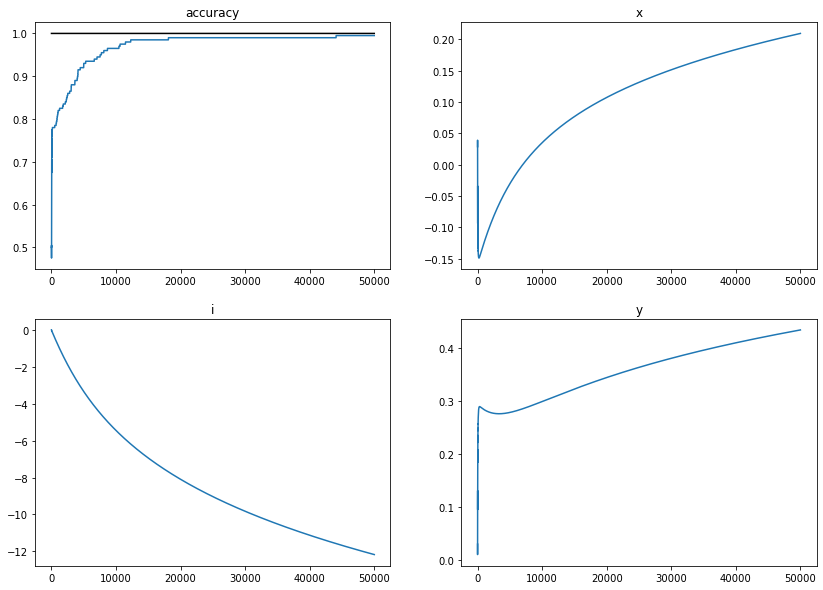

In [459]:
its = range(0, iter_limit) # значения по оси Х
fig = plt.figure(figsize=(14,10))
fig.add_subplot(2, 2, 1).set_title('accuracy')  # верхний левый график
plt.plot(its, np.ones(iter_limit), color='k')   # черная линия - просто единица
plt.plot(its, acc)                              # вывод графика точности
fig.add_subplot(2, 2, 2).set_title('x') # верхний правый график
plt.plot(its, [e[1] for e in par])
fig.add_subplot(2, 2, 4).set_title('y') # нижний правый график
plt.plot(its, [e[2] for e in par])
fig.add_subplot(2, 2, 3).set_title('i') # нижний левый график
plt.plot(its, [e[0] for e in par])
print(acc[-1])

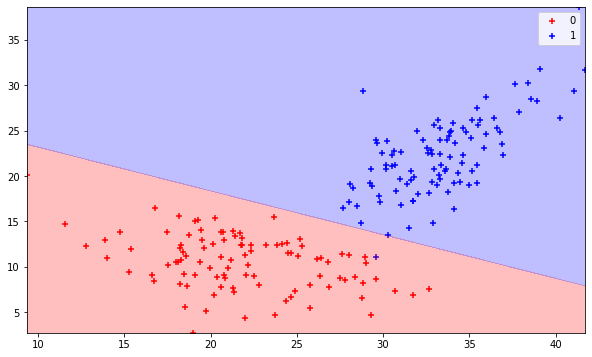

In [456]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='+', color='red', label='0')   # красные точки, класс 0
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', color='blue', label='1')  # синие точки, класс 1
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),  # пределы отрисовки по одной
x2_min, x2_max = X[:,1].min(), X[:,1].max(),  #   и второй координате
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))  # построение осей сетки
grid = np.c_[xx1.ravel(), xx2.ravel()]  # и самой сетки для классификации по всей поверхности для графика
probs = sigm(np.dot(intc(grid), C)).reshape(xx1.shape)  # выполнение классификации по сетке (всей поверхности)
plt.contourf(xx1, xx2, probs, [0, 0.5, 1], colors=['red', 'blue', 'black'], alpha=0.25);  # и отрисовка результата

Перевірте якість алгоритма за допомогою метрики accuracy (на тестових даних).

test accuracy: 0.9696


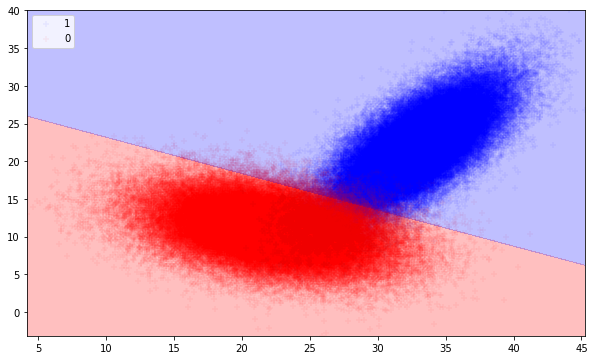

In [457]:
test_points = 100000  # для проверки берется очень много точек
t_pts_1 = np.random.multivariate_normal(mean_1, cov_1, test_points)  # генерация точек первого (0) класса
t_pts_2 = np.random.multivariate_normal(mean_2, cov_2, test_points)  #   и второго (1) класса
# -------------------------------------------------
tX = np.concatenate((t_pts_1, t_pts_2))                              # склейка по точкам
ty = np.concatenate((np.zeros(test_points), np.ones(test_points)))   #   и их классам
# -------------------------------------------------
print('test accuracy:', (np.round(sigm(np.dot(intc(tX), C))) == ty).mean())  # выполнение классификации и оценка точности
plt.figure(figsize=(10, 6))  # отрисовка графика аналогично предыдущему
plt.scatter(tX[ty == 1][:, 0], tX[ty == 1][:, 1], marker='+', color='blue', label='1', alpha=0.05)  # добавлена
plt.scatter(tX[ty == 0][:, 0], tX[ty == 0][:, 1], marker='+', color='red', label='0', alpha=0.05)   #   прозрачность
plt.legend()
x1_min, x1_max = tX[:,0].min(), tX[:,0].max(),
x2_min, x2_max = tX[:,1].min(), tX[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigm(np.dot(intc(grid), C)).reshape(xx1.shape)
plt.contourf(xx1, xx2, probs, [0, 0.5, 1], colors=['red', 'blue', 'black'], alpha=0.25);